In [1]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [2]:
G = nx.barabasi_albert_graph(5000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2018
Number of deinfluenced nodes: 0
Number of susceptible nodes: 2982
influencer {1, 1028, 1032, 1292, 2067, 4116, 4372, 534, 665, 1691, 286, 4000, 2208, 1442, 1445, 2469, 938, 3371, 1076, 2873, 3641, 1339, 4924, 4796, 575, 1344, 1601, 1090, 2372, 68, 1606, 4036, 4302, 2642, 3926, 729, 3683, 615, 1514, 2027, 1772, 3437, 4714, 4715, 499, 4725, 373, 2166, 3705, 2558}


In [4]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': {1714, 478}, 'Degree': set()}), (10, {'Random': {1425, 886, 3320, 2555, 1052}, 'Degree': set()}), (15, {'Random': {512, 929, 3650, 2792, 2422, 566, 347}, 'Degree': {3}}), (20, {'Random': {323, 803, 1444, 1160, 2156, 4365, 4558, 1556, 699}, 'Degree': {3}}), (25, {'Random': {1285, 71, 936, 1384, 3017, 2155, 4817, 4530, 2642, 2777, 1940, 3124, 2681, 699, 3516}, 'Degree': {3, 5}}), (30, {'Random': {1889, 4135, 4903, 2348, 2414, 3758, 2766, 4467, 2772, 4661, 2133, 2199, 3701, 2201, 214, 3003, 2940, 1524}, 'Degree': {3, 5}}), (35, {'Random': {3081, 523, 653, 4239, 405, 2041, 542, 926, 4641, 1976, 1979, 4927, 1730, 4554, 75, 2380, 4816, 2513, 1887, 4345}, 'Degree': {3, 5, 6}}), (40, {'Random': {1037, 3214, 3094, 177, 2613, 1592, 1722, 827, 4548, 4549, 3276, 1359, 3802, 96, 4070, 2158, 1267, 1909, 124, 1279}, 'Degree': {3, 5, 6}}), (45, {'Random': {4741, 2437, 2057, 4625, 1427, 4499, 3990, 1951, 2337, 290, 2085, 2729, 2235, 2623, 4545, 4

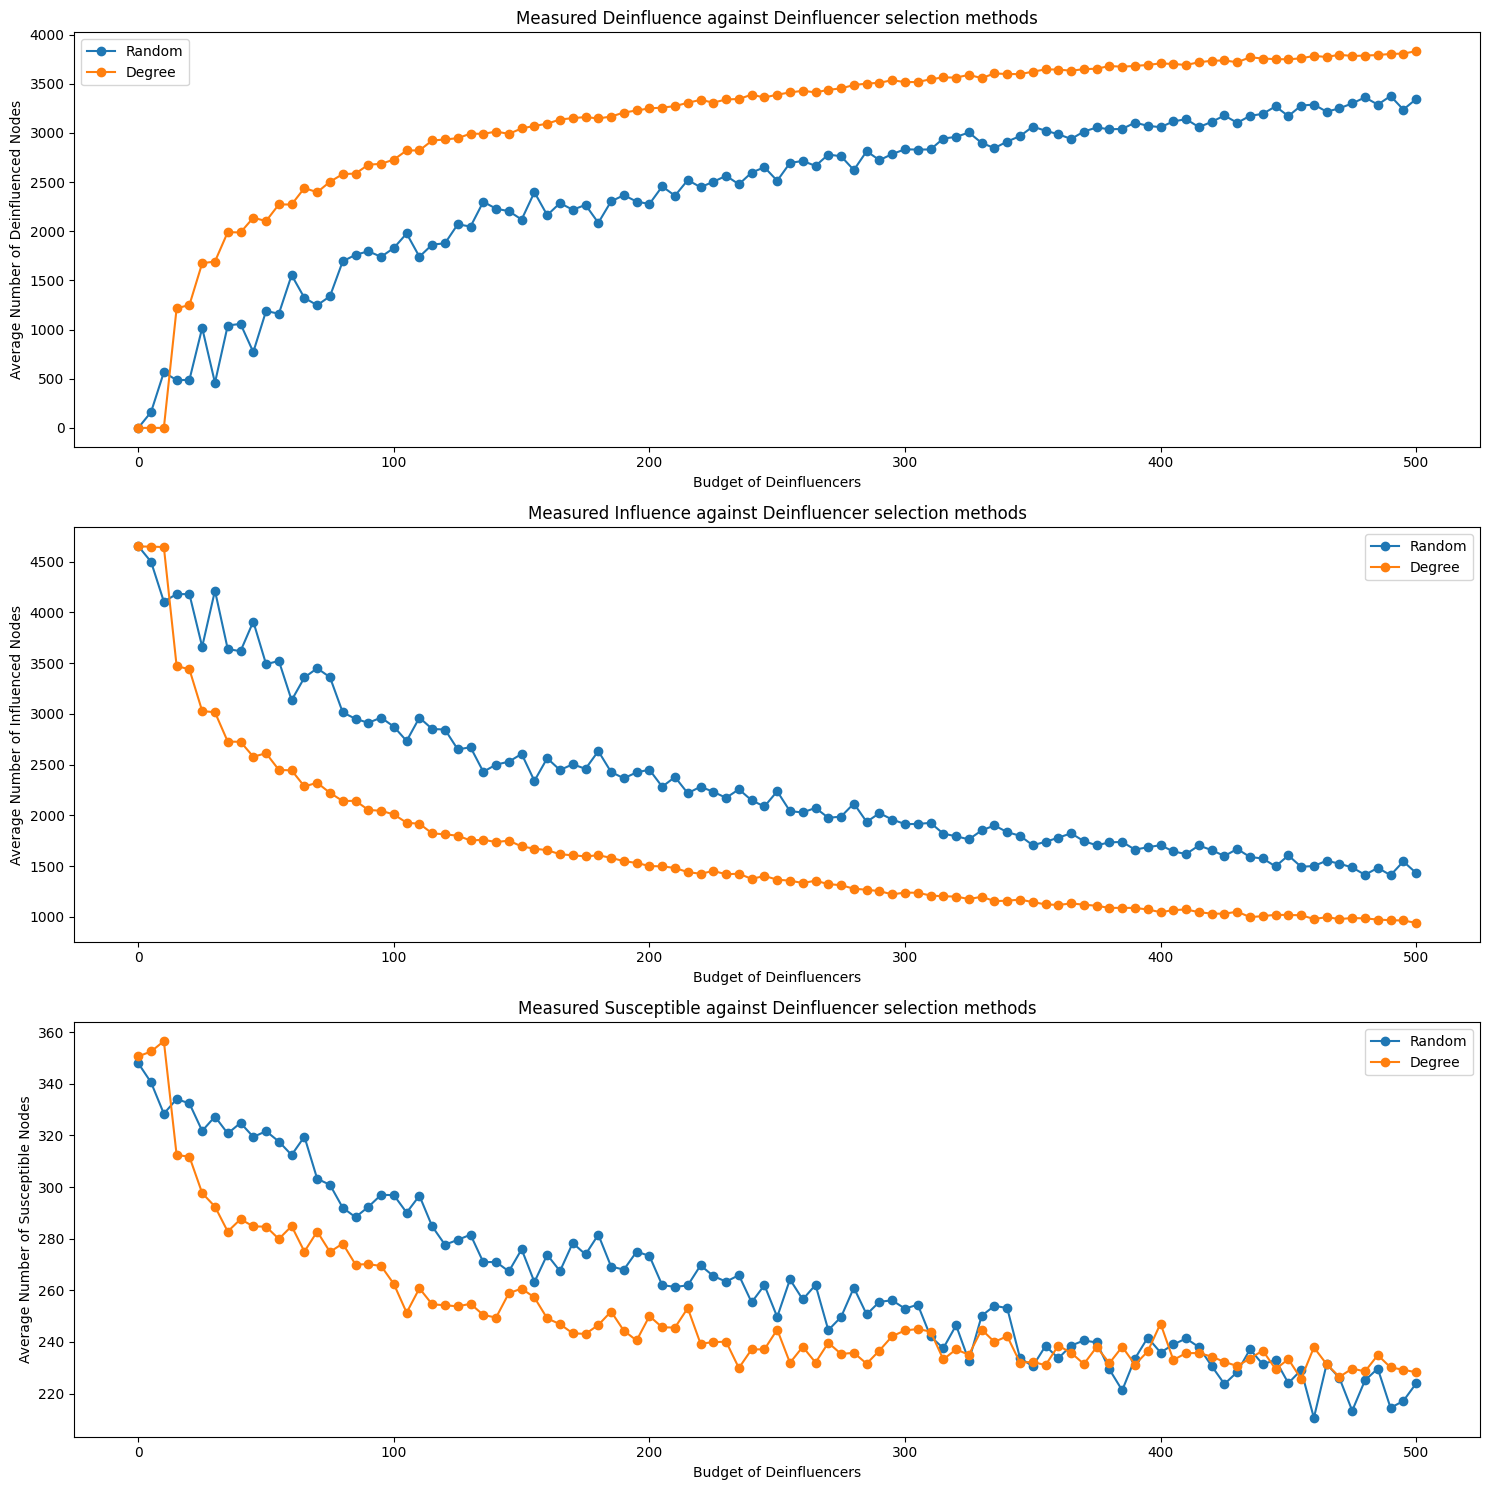

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': {764, 3445}, 'Degree': set()}), (10, {'Random': {3008, 2374, 1785, 3834, 3997}, 'Degree': set()}), (15, {'Random': {2436, 133, 1389, 690, 2258, 2806, 1019, 1852}, 'Degree': {3}}), (20, {'Random': {4864, 1416, 267, 2877, 4820, 1204, 3736, 3929, 378, 4699, 3549}, 'Degree': {3}}), (25, {'Random': {610, 1891, 136, 4905, 906, 2764, 4430, 4399, 4239, 2034, 818, 470, 3033}, 'Degree': {3, 5}}), (30, {'Random': {3878, 4838, 2536, 3449, 1894, 3021, 4431, 1778, 2612, 3038, 2805, 52, 1624, 1273, 3323, 4606, 3711}, 'Degree': {3, 5}}), (35, {'Random': {4512, 2339, 388, 1988, 4835, 1703, 4711, 3117, 3598, 3535, 1520, 3091, 2388, 277, 62, 954, 764, 4190}, 'Degree': {3, 5, 6}}), (40, {'Random': {1152, 4354, 2563, 4484, 1283, 4883, 3738, 2603, 1964, 1968, 1334, 4548, 4036, 1990, 2506, 459, 586, 1101, 2660, 1766, 2279, 1769, 361, 4084}, 'Degree': {3, 5, 6}}), (45, {'Random': {903, 648, 2451, 789, 4630, 2712, 4636, 1184, 4647, 4010, 427, 691, 1334, 

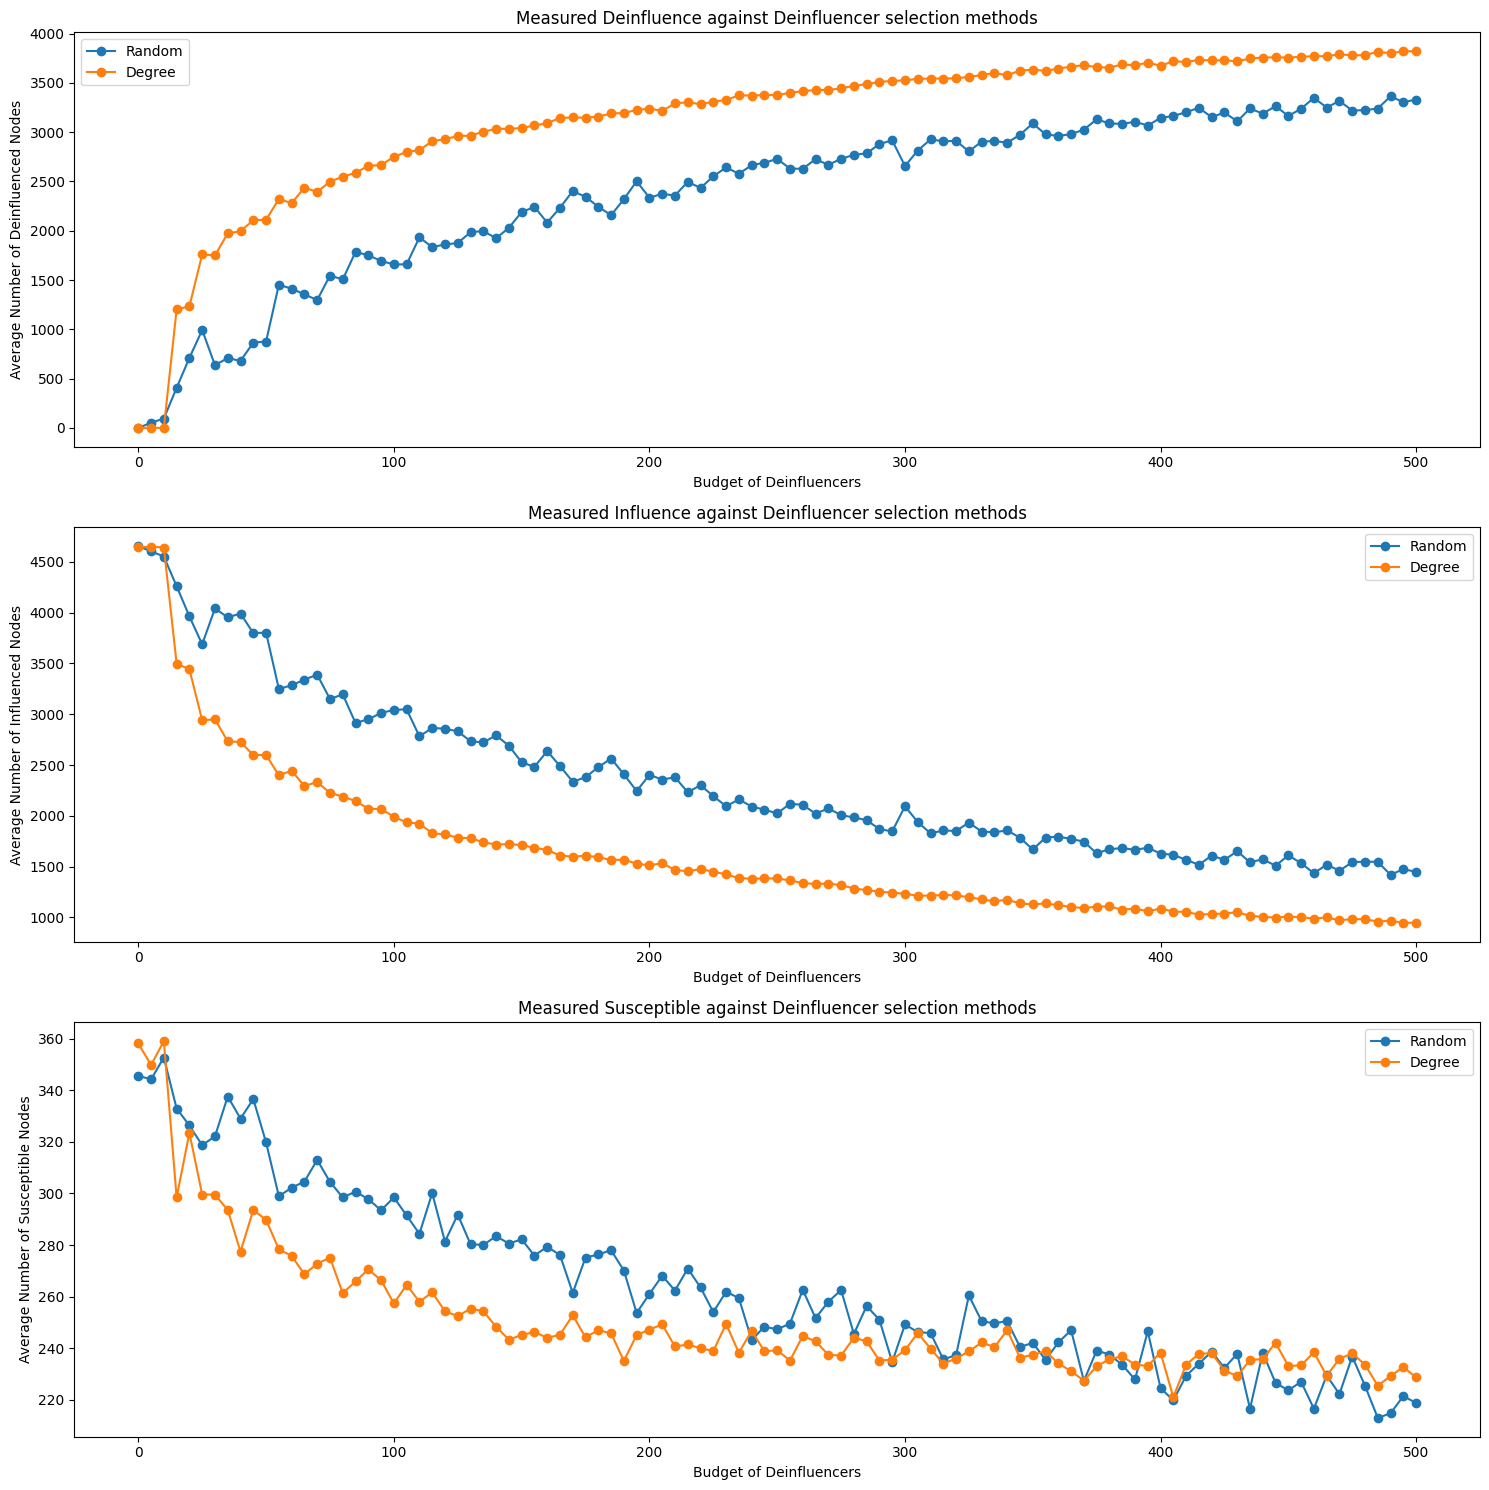

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()